In [1]:
from haven import haven_jupyter as hj
from haven import haven_results as hr

try:
    %load_ext google.colab.data_table
except:
    pass

# path to where the experiments got saved
savedir_base = 'output'

# filter exps
filterby_list = None
# get experiments
rm = hr.ResultManager(savedir_base=savedir_base, 
                      filterby_list=filterby_list, 
                      verbose=0)
# dashboard variables
title_list = ['dataset', 'model']
y_metrics = ['train_loss']

# launch dashboard
hj.get_dashboard(rm, vars(), wide_display=True)

100%|██████████| 2/2 [00:00<00:00, 3153.61it/s]


Label(value='Loading Dashboard...', layout=Layout(width='200px'))

<IPython.core.display.Javascript object>

Output()

In [2]:
from src import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
exp_dict = {'batch_size': 10,
 'dataset': {'name': 'trancos', 'transform': 'rgb_normalize'},
 'dataset_size': {'train': 'all', 'val': 'all'},
 'lr': 1e-05,
 'max_epoch': 100,
 'model': {'base': 'fcn8_vgg16', 'name': 'lcfcn'},
 'optimizer': 'adam'}


In [4]:
dataset = datasets.trancos.Trancos(split='train', datadir='TRANCOS_v3', exp_dict=exp_dict)

In [5]:
train_loader = DataLoader(dataset,
                          batch_size=1, 
                          drop_last=True)

In [11]:
a = next(train_loader)

TypeError: 'DataLoader' object is not an iterator

In [6]:
dataset[0]

/home/roberto/Documentos/PhD/LCFCN/src/datasets/transformers.py:47: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.LongTensor(np.asarray(x))


{'images': tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-0.3027, -0.1999, -0.1486,  ..., -0.1828,  0.3823, -0.8678],
          [-0.1657, -0.1828, -0.1143,  ..., -0.8164,  0.1768, -0.2342],
          [-0.4911, -0.5253, -0.4739,  ..., -1.8953, -1.6898, -1.7069]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-0.2500, -0.1450, -0.0924,  ..., -0.2150,  0.4503, -0.7577],
          [-0.0924, -0.1099, -0.0399,  ..., -0.8452,  0.2402, -0.1275],
          [-0.4076, -0.4426, -0.3901,  ..., -1.8431, -1.6155, -1.6155]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044

In [7]:
image, points, counts, meta = dataset[0]['images'], dataset[0]['points'], dataset[0]['counts'], dataset[0]['meta']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


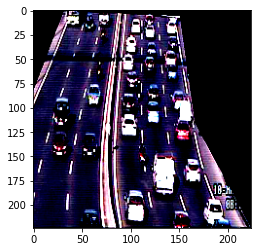

In [8]:
plt.imshow(  image.permute(1, 2, 0)  )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


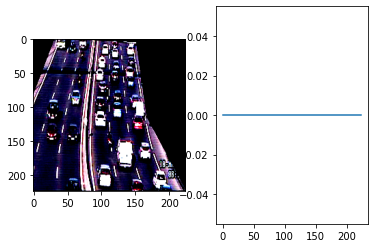

In [10]:
# assuming mask is batch x h x w and we want the first
plt.subplot(1, 2, 1) # have two plots in 1 row two columns, first plot
# assuming im is batch x channel x h x w and channel is RGB
plt.imshow(image.detach().cpu().permute(1, 2, 0))
plt.subplot(1, 2, 2) # second plot
plt.plot(points[0].detach().cpu())

In [11]:
points

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [12]:
import cv2

In [18]:
points.shape

torch.Size([224, 224])